<a href="https://colab.research.google.com/github/juliandavidoviedo/Tesis/blob/main/ANN_AS7341.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Vegetables and Fruits Ripeness Detection by Color w/ TensorFlow
#
# Windows, Linux, or Ubuntu
#
# By Kutluhan Aktar
#
# Collate spectral color data of varying fruits and vegetables and interpret this data set w/ a neural network model to predict ripening stages. 
#
#
# For more information:
# https://www.theamplituhedron.com/projects/Vegetables_and_Fruits_Ripeness_Detection_by_Color_w_TensorFlow/

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data= pd.read_csv('spectral_color_database_B1MbS29M9D.csv')  

# Create a class to build a neural network model after getting, visualizing, and scaling (normalizing) the data set of fruits and vegetables based on spectral color.
class Ripeness_Detection:
    def __init__(self, data):
        self.df = data
        self.inputs = []
        self.labels = []
        # Define class names for each ripening stage based on color.
        self.ripeness_class_names = ["Early Ripe", "Partially Ripe", "Ripe", "Decay"]
    # Create graphics for requested columns.
    def graphics(self, column_1, column_2, x_label, y_label):
        # Show requested columns from the data set:
        plt.style.use("dark_background")
        plt.gcf().canvas.set_window_title('Vegetables and Fruits Ripeness Detection by Color')
        plt.hist2d(self.df[column_1], self.df[column_2], cmap='RdBu')
        plt.colorbar()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(x_label)
        plt.show()
    # Visualize data before creating and feeding the neural network model.
    def data_visualization(self):
        # Scrutinize requested columns to build a model with appropriately formatted data:
        self.graphics('F1', 'NIR_1', 'F1(405-425nm)', 'Near-Infrared')
        self.graphics('F2', 'NIR_1', 'F2(435-455nm)', 'Near-Infrared')
        self.graphics('F3', 'NIR_1', 'F3(470-490nm)', 'Near-Infrared')
        self.graphics('F4', 'NIR_1', 'F4(505-525nm)', 'Near-Infrared')
        self.graphics('F5', 'NIR_2', 'F5(545-565nm)', 'Near-Infrared')
        self.graphics('F6', 'NIR_2', 'F6(580-600nm)', 'Near-Infrared')
        self.graphics('F7', 'NIR_2', 'F7(620-640nm)', 'Near-Infrared')
        self.graphics('F8', 'NIR_2', 'F8(670-690nm)', 'Near-Infrared')
    # Assign labels for each fruit or vegetable reading according to the pre-defined classes.
    def define_and_assign_labels(self):
        self.labels = self.df.pop("Ripeness")
    # Scale (normalize) data depending on the neural network model and define inputs.
    def scale_data_and_define_inputs(self):
        self.df["scaled_F1"] = self.df.pop("F1") / 1000
        self.df["scaled_F2"] = self.df.pop("F2") / 1000
        self.df["scaled_F3"] = self.df.pop("F3") / 1000
        self.df["scaled_F4"] = self.df.pop("F4") / 1000
        self.df["scaled_F5"] = self.df.pop("F5") / 1000
        self.df["scaled_F6"] = self.df.pop("F6") / 1000
        self.df["scaled_F7"] = self.df.pop("F7") / 1000
        self.df["scaled_F8"] = self.df.pop("F8") / 1000
        self.df["scaled_NIR_1"] = self.df.pop("NIR_1") / 1000
        self.df["scaled_NIR_2"] = self.df.pop("NIR_2") / 1000
        # Create the inputs array using the scaled variables:
        for i in range(len(self.df)):
            self.inputs.append(np.array([self.df["scaled_F1"][i], self.df["scaled_F2"][i], self.df["scaled_F3"][i], self.df["scaled_F4"][i], self.df["scaled_F5"][i], self.df["scaled_F6"][i], self.df["scaled_F7"][i], self.df["scaled_F8"][i], self.df["scaled_NIR_1"][i], self.df["scaled_NIR_2"][i]]))
        self.inputs = np.asarray(self.inputs)
    # Split inputs and labels into training and test sets.
    def split_data(self):
        l = len(self.df)
        # (95%, 5%) - (training, test)
        self.train_inputs = self.inputs[0:int(l*0.95)]
        self.test_inputs = self.inputs[int(l*0.95):]
        self.train_labels = self.labels[0:int(l*0.95)]
        self.test_labels = self.labels[int(l*0.95):]
    # Build and train an artificial neural network (ANN) to make predictions on the ripening stages of fruits and vegetables based on spectral color.
    def build_and_train_model(self):
        # Build the neural network:
        self.model = keras.Sequential([
            keras.Input(shape=(10,)),
            keras.layers.Dense(16),
            keras.layers.Dense(32),
            keras.layers.Dense(64),
            keras.layers.Dense(128),
            keras.layers.Dense(256),
            keras.layers.Dense(4, activation='softmax')
        ])
        # Compile:
        self.model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
        # Train:
        self.model.fit(self.train_inputs, self.train_labels, epochs=19)
        # Test the accuracy:
        print("\n\nModel Evaluation:")
        test_loss, test_acc = self.model.evaluate(self.test_inputs, self.test_labels) 
        print("Evaluated Accuracy: ", test_acc)
    # Save the model for further usage:

# Visualize data:
#fruits_and_vegetables.data_visualization()

# Artificial Neural Network (ANN):
#fruits_and_vegetables.Neural_Network(False)

# Make predictions:
#fruits_and_vegetables.make_predictions()


In [10]:
print(data)


     F1  F2   F3   F4    F5    F6    F7   F8  NIR_1  NIR_2  Ripeness   Date
0    14  14   14   45   131    65    29   63     54     66         0  06/11
1    18  17   18   69   191    93    39   71     62     58         0  06/11
2    21  19   21   76   205    98    39   71     68     54         0  06/11
3    97  91  122  589  1000  1000  1000  604    227    215         0  06/11
4    52  44   60  240   756   869   672  378    126    129         0  06/11
..   ..  ..  ...  ...   ...   ...   ...  ...    ...    ...       ...    ...
325   1   0    1    0     0     0     4    8      4      0         3  06/20
326   3   3    3    2    29    34    34   27     10     10         3  06/20
327   4   3    4    4     1     1     0    7     16      8         3  06/20
328   3   3    2    2     2     2     2    8     12     10         3  06/20
329   2   1    1    2     3     3     2    7     10     12         3  06/20

[330 rows x 12 columns]


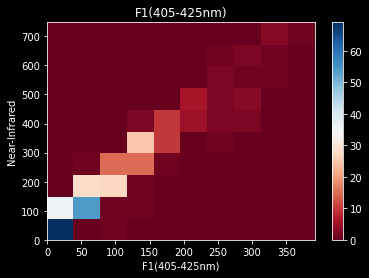

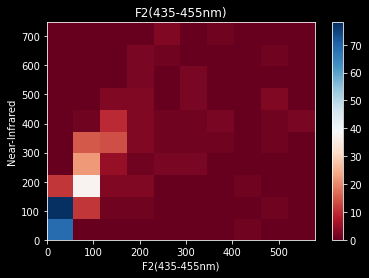

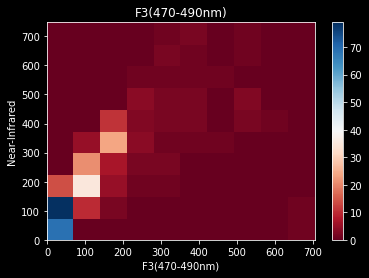

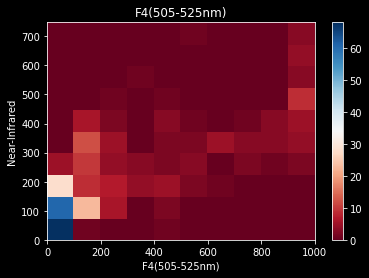

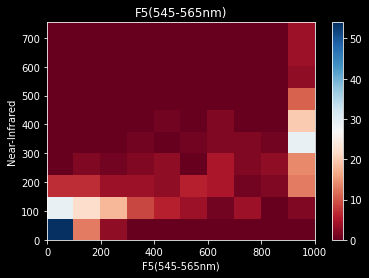

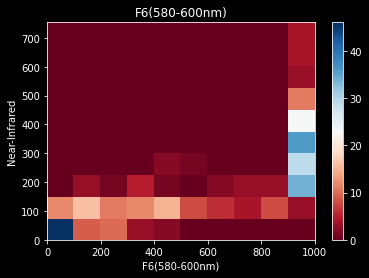

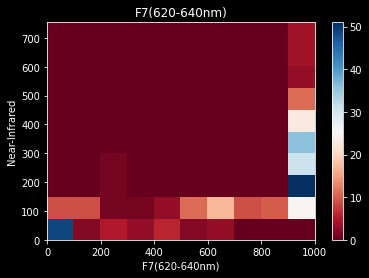

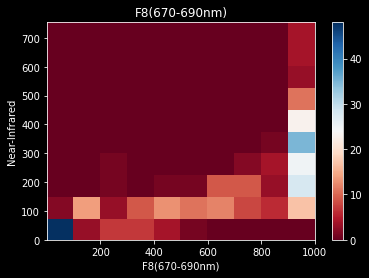

Epoch 1/19
10/10 [==============================] - 1s 4ms/step - loss: 1.1494 - accuracy: 0.4409
Epoch 2/19
10/10 [==============================] - 0s 4ms/step - loss: 0.8434 - accuracy: 0.7284
Epoch 3/19
10/10 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.7380
Epoch 4/19
10/10 [==============================] - 0s 4ms/step - loss: 0.6138 - accuracy: 0.7732
Epoch 5/19
10/10 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.7700
Epoch 6/19
10/10 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.7668
Epoch 7/19
10/10 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.7572
Epoch 8/19
10/10 [==============================] - 0s 4ms/step - loss: 0.4930 - accuracy: 0.7764
Epoch 9/19
10/10 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.7796
Epoch 10/19
10/10 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7827
Epoch 11/19
10/10 [

In [21]:
# Vegetables and Fruits Ripeness Detection by Color w/ TensorFlow
#
# Windows, Linux, or Ubuntu
#
# By Kutluhan Aktar
#
# Collate spectral color data of varying fruits and vegetables and interpret this data set w/ a neural network model to predict ripening stages. 
#
#
# For more information:
# https://www.theamplituhedron.com/projects/Vegetables_and_Fruits_Ripeness_Detection_by_Color_w_TensorFlow/

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#data= pd.read_csv('spectral_color_database_B1MbS29M9D.csv')  
# Create a class to build a neural network model after getting, visualizing, and scaling (normalizing) the data set of fruits and vegetables based on spectral color.
class Ripeness_Detection:
    def __init__(self, data):
        self.df = data
        self.inputs = []
        self.labels = []
        # Define class names for each ripening stage based on color.
        self.ripeness_class_names = ["Early Ripe", "Partially Ripe", "Ripe", "Decay"]
    # Create graphics for requested columns.
    def graphics(self, column_1, column_2, x_label, y_label):
        # Show requested columns from the data set:
        plt.style.use("dark_background")
        plt.gcf().canvas.set_window_title('Vegetables and Fruits Ripeness Detection by Color')
        plt.hist2d(self.df[column_1], self.df[column_2], cmap='RdBu')
        plt.colorbar()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(x_label)
        plt.show()
    # Visualize data before creating and feeding the neural network model.
    def data_visualization(self):
        # Scrutinize requested columns to build a model with appropriately formatted data:
        self.graphics('F1', 'NIR_1', 'F1(405-425nm)', 'Near-Infrared')
        self.graphics('F2', 'NIR_1', 'F2(435-455nm)', 'Near-Infrared')
        self.graphics('F3', 'NIR_1', 'F3(470-490nm)', 'Near-Infrared')
        self.graphics('F4', 'NIR_1', 'F4(505-525nm)', 'Near-Infrared')
        self.graphics('F5', 'NIR_2', 'F5(545-565nm)', 'Near-Infrared')
        self.graphics('F6', 'NIR_2', 'F6(580-600nm)', 'Near-Infrared')
        self.graphics('F7', 'NIR_2', 'F7(620-640nm)', 'Near-Infrared')
        self.graphics('F8', 'NIR_2', 'F8(670-690nm)', 'Near-Infrared')
    # Assign labels for each fruit or vegetable reading according to the pre-defined classes.
    def define_and_assign_labels(self):
        self.labels = self.df.pop("Ripeness")
    # Scale (normalize) data depending on the neural network model and define inputs.
    def scale_data_and_define_inputs(self):
        self.df["scaled_F1"] = self.df.pop("F1") / 1000
        self.df["scaled_F2"] = self.df.pop("F2") / 1000
        self.df["scaled_F3"] = self.df.pop("F3") / 1000
        self.df["scaled_F4"] = self.df.pop("F4") / 1000
        self.df["scaled_F5"] = self.df.pop("F5") / 1000
        self.df["scaled_F6"] = self.df.pop("F6") / 1000
        self.df["scaled_F7"] = self.df.pop("F7") / 1000
        self.df["scaled_F8"] = self.df.pop("F8") / 1000
        self.df["scaled_NIR_1"] = self.df.pop("NIR_1") / 1000
        self.df["scaled_NIR_2"] = self.df.pop("NIR_2") / 1000
        # Create the inputs array using the scaled variables:
        for i in range(len(self.df)):
            self.inputs.append(np.array([self.df["scaled_F1"][i], self.df["scaled_F2"][i], self.df["scaled_F3"][i], self.df["scaled_F4"][i], self.df["scaled_F5"][i], self.df["scaled_F6"][i], self.df["scaled_F7"][i], self.df["scaled_F8"][i], self.df["scaled_NIR_1"][i], self.df["scaled_NIR_2"][i]]))
        self.inputs = np.asarray(self.inputs)
    # Split inputs and labels into training and test sets.
    def split_data(self):
        l = len(self.df)
        # (95%, 5%) - (training, test)
        self.train_inputs = self.inputs[0:int(l*0.95)]
        self.test_inputs = self.inputs[int(l*0.95):]
        self.train_labels = self.labels[0:int(l*0.95)]
        self.test_labels = self.labels[int(l*0.95):]
    # Build and train an artificial neural network (ANN) to make predictions on the ripening stages of fruits and vegetables based on spectral color.
    def build_and_train_model(self):
        # Build the neural network:
        self.model = keras.Sequential([
            keras.Input(shape=(10,)),
            keras.layers.Dense(16),
            keras.layers.Dense(32),
            keras.layers.Dense(64),
            keras.layers.Dense(128),
            keras.layers.Dense(256),
            keras.layers.Dense(4, activation='softmax')
        ])
        # Compile:
        self.model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
        # Train:
        self.model.fit(self.train_inputs, self.train_labels, epochs=19)
        # Test the accuracy:
        print("\n\nModel Evaluation:")
        test_loss, test_acc = self.model.evaluate(self.test_inputs, self.test_labels) 
        print("Evaluated Accuracy: ", test_acc)
    # Save the model for further usage:
    def save_model(self):
        self.model.save("/content/ann_ripeness_detection_kDFk1yJaTe.h5")
    # Run Artificial Neural Network (ANN):
    def Neural_Network(self, save):
        self.define_and_assign_labels()
        self.scale_data_and_define_inputs()
        self.split_data()
        self.build_and_train_model()
        if save:
            self.save_model()
    # Make ripening stage [0 - 3] predictions with the saved model:
    def make_predictions(self):
        saved_model = keras.models.load_model("/content/ann_ripeness_detection_kDFk1yJaTe.h5")
        prediction_array = np.array([
            [0.131,0.148,0.184,0.765,1,1,1,0.809,0.276,0.273],
            [0.143,0.122,0.157,0.228,1,1,1,1,0.335,0.334],
            [0.038,0.032,0.032,0.030,0.042,0.055,0.467,0.880,0.100,0.102],
            [0.002,0.001,0.001,0.002,0.003,0.003,0.002,0.007,0.010,0.012]
        ])
        predictions = saved_model.predict(prediction_array)
        print("\n\nModel Predictions:\n")
        for i in range(len(prediction_array)):
            print("INPUT[" + str(i+1) + "] => ", self.ripeness_class_names[np.argmax(predictions[i])])
            
# Read the collated data set of fruits and vegetables:
csv_path = "/content/spectral_color_database_B1MbS29M9D.csv"
df = pd.read_csv(csv_path)

# Define a new class object named 'fruits_and_vegetables':
fruits_and_vegetables = Ripeness_Detection(df)

# Visualize data:
fruits_and_vegetables.data_visualization()

# Artificial Neural Network (ANN):
fruits_and_vegetables.Neural_Network(False)

# Make predictions:
fruits_and_vegetables.make_predictions()


In [14]:
print(data)

     F1  F2   F3   F4    F5    F6    F7   F8  NIR_1  NIR_2  Ripeness   Date
0    14  14   14   45   131    65    29   63     54     66         0  06/11
1    18  17   18   69   191    93    39   71     62     58         0  06/11
2    21  19   21   76   205    98    39   71     68     54         0  06/11
3    97  91  122  589  1000  1000  1000  604    227    215         0  06/11
4    52  44   60  240   756   869   672  378    126    129         0  06/11
..   ..  ..  ...  ...   ...   ...   ...  ...    ...    ...       ...    ...
325   1   0    1    0     0     0     4    8      4      0         3  06/20
326   3   3    3    2    29    34    34   27     10     10         3  06/20
327   4   3    4    4     1     1     0    7     16      8         3  06/20
328   3   3    2    2     2     2     2    8     12     10         3  06/20
329   2   1    1    2     3     3     2    7     10     12         3  06/20

[330 rows x 12 columns]
